# Λ-Type Three-Level: Weak Pulse with Coupling in a Cloud — Pulse Compression

Time taken to solve this problem on a 2013 MacBook Pro:
**3h 22min 1s**

## Define the Problem

In [1]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      { "channels": [[0,1], [1,2]], 
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl_1": 1.0,
             "centre_1": 0.0,
             "fwhm_1": 1.0
          },
        "rabi_freq_t_func": "gaussian_1"
      },
      {
        "coupled_levels": [[1, 2]],
        "detuning": 0.0,
        "detuning_positive": false,
        "label": "coupling",
        "rabi_freq": 5.0,
        "rabi_freq_t_args": 
        {
          "ampl_2": 1.0,
          "fwhm_2": 0.2,
          "on_2": -1.0, 
          "off_2": 9.0
          },
        "rabi_freq_t_func": "ramp_onoff_2"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 70,
  "z_steps_inner": 100,
  "num_density_z_func": "gaussian_1",
  "num_density_z_args": {
    "ampl_1": 1.0,
    "fwhm_1": 0.5,
    "centre_1": 0.5
  },
  "interaction_strengths": [1.0e3, 1.0e3],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-lambda-weak-pulse-cloud-atoms-some-coupling" 
}
"""

In [2]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

### Number Density Profile

In this case we've defined a non-square profile for the number density as a function of $z$ (`num_density_z_func`). 

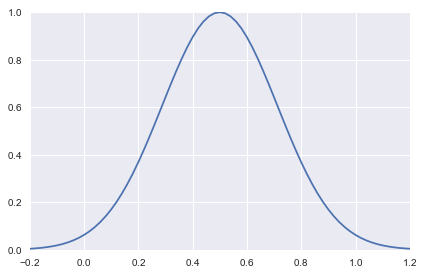

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.plot(mb_solve_00.zlist, 
         mb_solve_00.num_density_z_func(mb_solve_00.zlist, 
                                        mb_solve_00.num_density_z_args))

## Solve the Problem

In [4]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 1.92 ms, sys: 3.33 ms, total: 5.25 ms
Wall time: 7.12 ms


## Plot Output

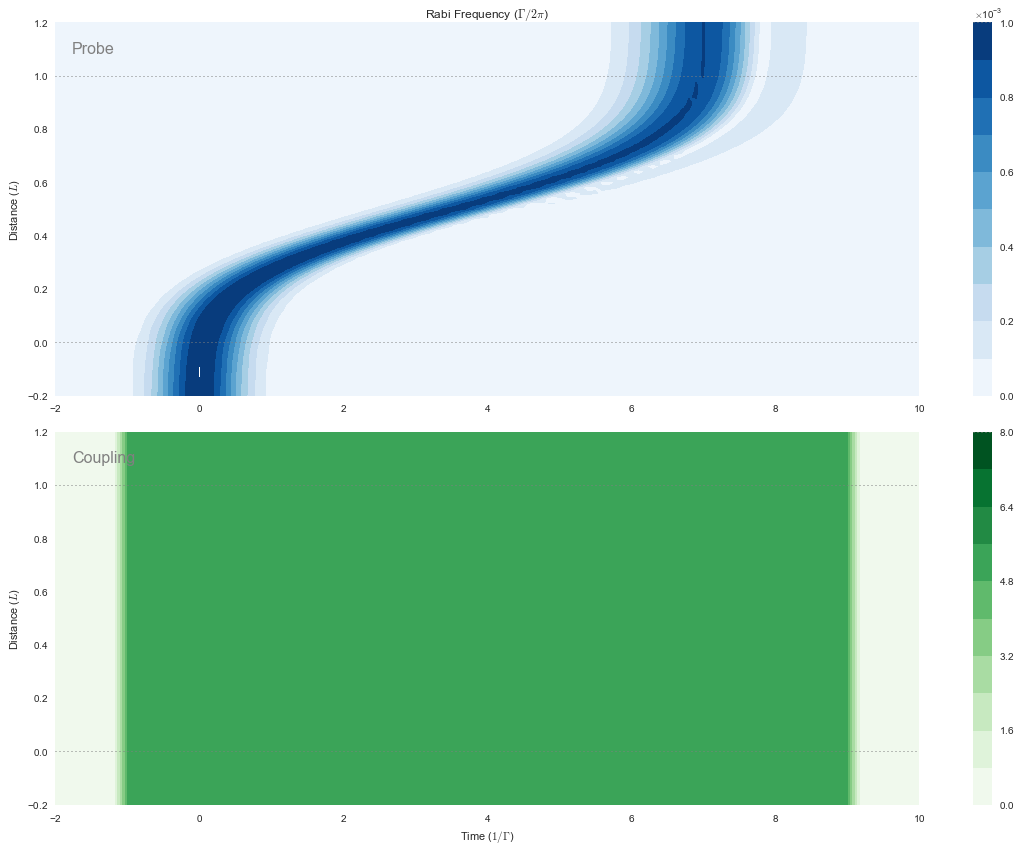

In [5]:
import numpy as np

fig = plt.figure(1, figsize=(16, 12))

# Probe 
ax = fig.add_subplot(211)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Probe',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Coupling
ax = fig.add_subplot(212)
cmap_range = np.linspace(0.0, 8.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Coupling',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Both
for ax in fig.axes:
    for y in [0.0, 1.0]:
        ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.tight_layout()
plt.savefig('images/mb-solve-lambda-weak-pulse-cloud-atoms-some-coupling.png')

## Analysis

From my [thesis](https://github.com/tommyogden/phd-thesis), §4.3.2.

> This high coefficient might correspond to either a particularly long or dense medium. We see from the gradient of the profile that the pulse slows down considerably as the density increases, and speeds up again as it leaves the medium. The overall slow-light effect is large, with the pulse arriving $8 \tau$ later than it would covering the same distance in vacuo.

>At the same time as it is slowed, the spatial extent of the pulse is significantly decreased as it moves into the high-density region. This happens because as the pulse moves into the medium its leading edge slows down before the trailing edge while the field strength remains the same, causing the pulse to ‘bunch up‘. The pulse is compressed by a factor $v g/c$. In the BEC experiment mentioned above, light pulses were com- pressed from kilometre to sub-millimetre scale.